***DataSet "Air-Pollution"***

---





Este análisis se basa en un dataset proporcionado por la tutora Silvana, a través de una carpeta que contenía varios archivos. De todos ellos, preferí seleccionar el que lleva por título “Air-pollution-and-MH”, en su primera versión disponible. Este conjunto de datos contiene información sobre la salud de varios pacientes, así como también sobre sus condiciones de vida diaria y trabajo. Incluye columnas como edad, sueño, nivel de estrés, consumo de drogas o alcohol, género, distrito de residencia y varios indicadores relacionados con la salud y el bienestar, muchos de ellos vinculados al contexto del COVID, entre otros.

El objetivo principal es identificar patrones de comportamiento en las conductas y condiciones de vida diaria de los pacientes, en relación con la calidad del aire que respiran, y explorar las posibles correlaciones entre estos factores. Asimismo, se buscará segmentar a los pacientes por categorías y analizar tendencias históricas.

Para ello, se aplicarán técnicas de limpieza de datos y se completarán las celdas vacías. Además, se utilizará la biblioteca pandas para el análisis exploratorio y la visualización de la información mediantes Matplotlib. También se aplicarán métricas descriptivas como media y mediana, y se evaluará la evolución temporal, ya que el dataset incluye fechas de inicio y fin para los datos recopilados.

Este análisis busca brindar información útil para la toma de decisiones, tanto en el ámbito personal como laboral, en las ciudades o países a los que pertenecen las personas analizadas. A su vez, representa una oportunidad para mejorar la calidad del trabajo de estas personas, ya que condiciones más saludables resultarían más beneficiosas y productivas para las empresas y organismos donde desempeñan sus labores. El trabajo también constituye una instancia valiosa para aplicar conocimientos de análisis de datos en un contexto real.

Se establecen las siguientes preguntas:


*   ¿Qué correlación existe entre contaminación del aire y niveles de estrés o sueño?
*   ¿Las personas que consumen alcohol o drogas en zonas con mala calidad del aire son afectadas en su salud mental?
*   ¿Que dsitritos son los mas afectados por la mala calidad del aire?
*   ¿En qué rangos de edad o género se observan más diferencias?








In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Comencé cargando el dataset desde Google Drive como archivo de Excel, ya que me pareció más fácil de subir y leer el mismo.

In [ ]:
import pandas as pd
file_path = '/content/gdrive/MyDrive/Air-poluttion.xlsx'
df = pd.read_excel(file_path)

Utilizo la función .head() para ver las primeras filas del DataFrame.

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')
df.head()


,ID_Zenodo,date_all,year,month,day,dayoftheweek,hour,mentalhealth_survey,occurrence_mental,bienestar,...,education,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
0,71,22190,2020,10,2,4,18,Yes,1.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado mucho,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo igual que antes
1,112,22202,2020,10,14,2,22,Yes,2.0,8.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,NaN,Lo utilizo más que antes,Lo utilizo menos que antes
2,110,22217,2020,10,29,3,18,Yes,10.0,9.0,...,Universitario,Ha empeorado mucho,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes
3,115,22222,2020,11,3,1,18,Yes,14.0,3.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo menos que antes
4,135,22231,2020,11,12,3,22,Yes,12.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,No ha cambiado,NaN,NaN,Lo utilizo menos que antes,Lo utilizo más que antes


y la función .shape para ver el tamaño del mismo.

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')
df.shape

(3348, 95)

Luego utilizo .dtypes para ver el tipo de archivo que contiene cada columna.

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')
df.dtypes

,0
ID_Zenodo,int64
date_all,int64
year,int64
month,int64
day,int64
...,...
covid_aire,object
covid_motor,object
covid_electric,object
covid_bikewalk,object


Ahora me fijo en la cantidad de nulos que hay por cada variable.

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')
df.isnull().sum()

,0
ID_Zenodo,0
date_all,0
year,0
month,0
day,0
...,...
covid_aire,198
covid_motor,253
covid_electric,302
covid_bikewalk,212


Como ya sé que tengo celdas vacías dentro del dataset, decido reemplazarlas con un valor constante igual a 0.

In [ ]:
df_fillna = df.fillna(0)
print(df_fillna)



      ID_Zenodo  date_all  year  month  day  dayoftheweek  hour  \
0            71     22190  2020     10    2             4    18   
1           112     22202  2020     10   14             2    22   
2           110     22217  2020     10   29             3    18   
3           115     22222  2020     11    3             1    18   
4           135     22231  2020     11   12             3    22   
...         ...       ...   ...    ...  ...           ...   ...   
3343        186     22227  2020     11    8             6    22   
3344        137     22230  2020     11   11             2    18   
3345        186     22240  2020     11   21             5    19   
3346        175     22238  2020     11   19             3    22   
3347        186     22241  2020     11   22             6    20   

     mentalhealth_survey  occurrence_mental  bienestar  ...      education  \
0                    Yes                1.0        9.0  ...  Universitario   
1                    Yes               

Comienzo a establecer los analisis numericos que se utilizaran, comenzando con aquellos relacionados a la edad:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pf = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')
df['age_yrs'].mean()



np.float64(37.82156368221942)

In [ ]:
df.groupby('age_yrs')['sueno'].mean()

,sueno
age_yrs,
18.0,7.357143
19.0,7.414815
20.0,7.216667
21.0,4.476190
22.0,6.400000
23.0,7.973684
24.0,7.253731
25.0,6.796296
26.0,7.047619


In [ ]:
df.groupby('age_yrs')['estres'].mean()

,estres
age_yrs,
18.0,3.988372
19.0,4.451128
20.0,4.758621
21.0,4.238095
22.0,5.566667
23.0,1.552632
24.0,3.062500
25.0,4.055556
26.0,4.033898


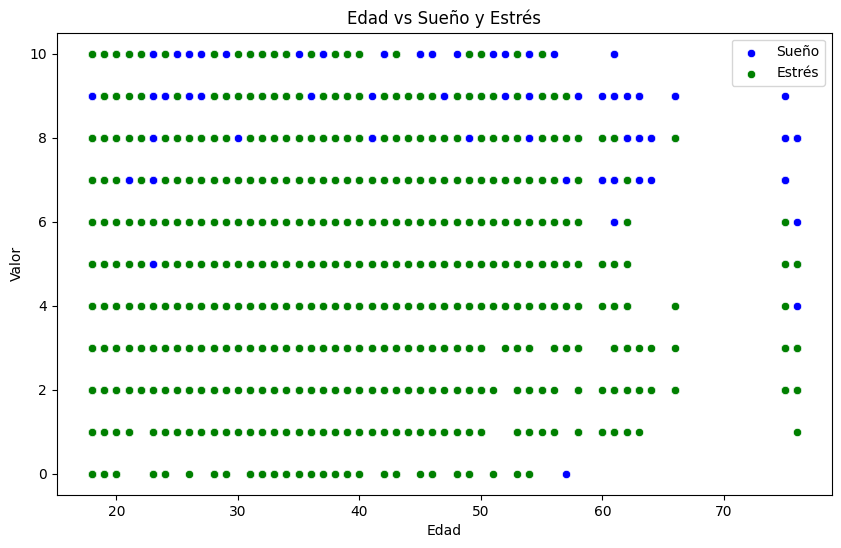

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_yrs', y='sueno', data=df, color='blue', label='Sueño')
sns.scatterplot(x='age_yrs', y='estres', data=df, color='green', label='Estrés')
plt.xlabel('Edad')
plt.ylabel('Valor')
plt.title('Edad vs Sueño y Estrés')
plt.legend()
plt.show()


Continuo con quellos que se relacionaran al sueño:

In [ ]:
import matplotlib.pyplot as plt
pf = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')
df['sueno'].median()

7.0

In [ ]:
df.groupby('gender')['sueno'].mean()


,sueno
gender,
Hombre,6.910464
Mujer,6.892794
Otra,7.000000


<Axes: xlabel='sueno', ylabel='Count'>

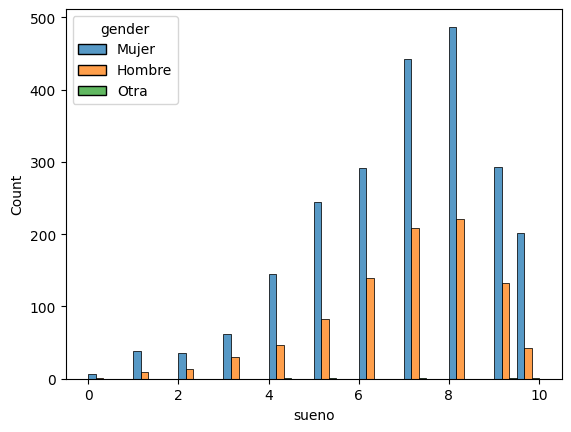

In [ ]:
sns.histplot(data=df, x='sueno', hue='gender', multiple='dodge', bins=20)


In [ ]:
df['no2gps_24h_x30'].corr(df['sueno'])


np.float64(-0.08920753379481393)

En esta ultima se observa un valor cercano a -1 lo que significa una correlación negativa fuerte, por lo que no hay mucha relacion en la cantidad de horas de sueño y la contaminacion del aire.

Continuo con aquellos analisis relacionados al estrés:

In [ ]:
import matplotlib.pyplot as plt

pf = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')
df['estres'].median()

4.0

In [ ]:
df['estres'].std()

2.501091194179913

In [ ]:
df.groupby('gender')['estres'].mean()

,estres
gender,
Hombre,4.072432
Mujer,4.328258
Otra,3.800000


<Axes: xlabel='estres', ylabel='Count'>

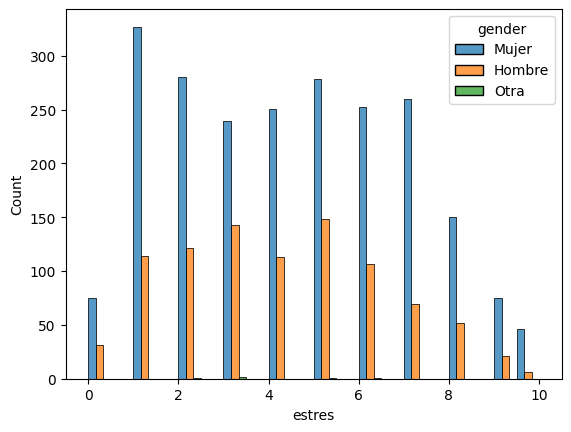

In [ ]:
sns.histplot(data=df, x='estres', hue='gender', multiple='dodge', bins=20)


In [ ]:
df.groupby('district')['estres'].mean()


,estres
district,
16,4.181818
Ciutat Vella,4.593750
Eixample,4.344291
Gràcia,4.267490
Horta-Guinardo,4.659574
Les Corts,3.065574
Nou Barris,5.019608
Sant Andreu,3.964602
Sant Martí,4.163859


/tmp/ipython-input-3473498616.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='district', y='estres', estimator='mean', ci=None)


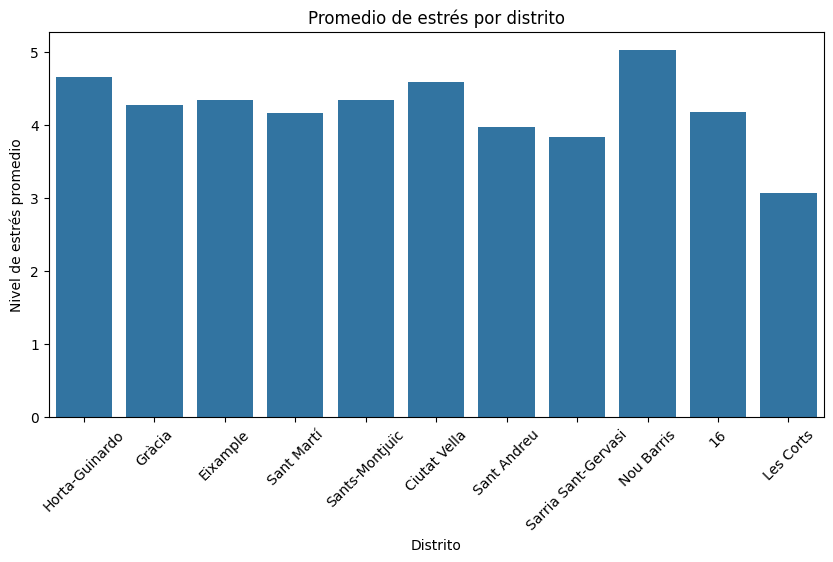

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='district', y='estres', estimator='mean', ci=None)
plt.title('Promedio de estrés por distrito')
plt.xlabel('Distrito')
plt.ylabel('Nivel de estrés promedio')
plt.xticks(rotation=45)  # Rota los nombres si son largos
plt.show()


In [ ]:
df['no2gps_24h_x30'].corr(df['estres'])

np.float64(0.18794738681791057)

De igual manera que con el sueño en esta correlacion se observa un valor cercano a 0 por lo que hay muy poca relacion entre la contaminacion y el estrés.

# **Elección de Modelo**

Como estas variables son mas del tipo numerico, decido utilizar mas la estadisitica de ANOVA F-Test y asi determinar que modelo utilizar :

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_regression, SelectKBest

df = pd.read_excel('/content/gdrive/MyDrive/Air-poluttion.xlsx')

# Selección de columnas relevantes para testeo ANOVA:
df_anova = df[["gender", "district", "drogas", "sueno"]].copy()

# Elimino filas nulas dentro de la columna 'sueno':
df_anova.dropna(subset=['sueno'], inplace=True)

# Convierto variables categoricas a numericas:
X = pd.get_dummies(df_anova[["gender", "district", "drogas"]])
y = df_anova["sueno"]

# Aplico ANOVA F-Test:
f_selector = SelectKBest(score_func=f_regression, k="all")
f_selector.fit(X, y)

anova_scores = pd.DataFrame({
    "Variable": X.columns,
    "F_Score": f_selector.scores_,
    "p_value": f_selector.pvalues_
}).sort_values(by="F_Score", ascending=False)

print(anova_scores)

                        Variable    F_Score       p_value
10          district_Sant Andreu  34.551118  4.580774e-09
4          district_Ciutat Vella  20.432363  6.402389e-06
12       district_Sants-Montjuïc  10.681643  1.093522e-03
7        district_Horta-Guinardo   5.214549  2.246415e-02
11           district_Sant Martí   5.108120  2.388131e-02
8             district_Les Corts   3.726701  5.363765e-02
9            district_Nou Barris   3.678027  5.522330e-02
14                     drogas_No   1.543579  2.141772e-01
15                    drogas_Yes   1.341602  2.468384e-01
3                    district_16   0.800101  3.711308e-01
5              district_Eixample   0.077893  7.801910e-01
0                  gender_Hombre   0.054485  8.154496e-01
6                district_Gràcia   0.049848  8.233420e-01
1                   gender_Mujer   0.041645  8.383106e-01
13  district_Sarria Sant-Gervasi   0.038240  8.449754e-01
2                    gender_Otra   0.013039  9.090940e-01


De este último podemos observar con la columna **F_score** que hay una gran correlacion entre los distritos Sant Andreu, Ciutat Vella, y Sants-Montjuic con la contaminacion, asi mismo observamos que como lo planteamos antes, no existe una gran relacion entre el uso de drogas, estres o horas de sueño con la contaminacion de NO2 presente en el aire.


Esto lo podemos observar en el siguiente Heatmap de correlaciones numericas:

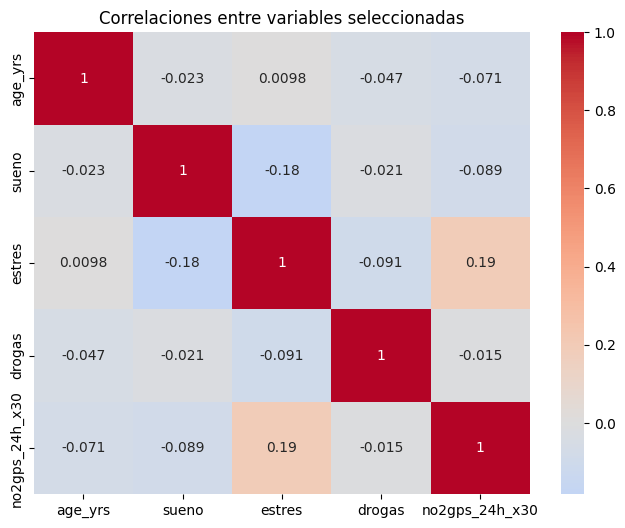

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables que queremos analizar
num_vars = ["age_yrs", "sueno", "estres", "drogas", "no2gps_24h_x30"]
df_plot = df[num_vars].copy()

# Convierto "drogas" a numerico:
df_plot["drogas"] = df_plot["drogas"].map({"No": 0, "Yes": 1})

# Calculo la matriz de correlación
corr = df_plot.corr(method="pearson")
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones entre variables seleccionadas")
plt.show()



Como se puede observar, al tener valores muy cercanos al 0 se puede confirmar que no hay una gran correlacion entre estas variables y la cantidad de NO2 presente.

# **Modelo Regresivo Lineal**

Una vez que ya determino una relacion entre los distritos y la concentracion de NO2 decido utilizar un modelo regresivo lineal que se enfoque mas hacia esta variable y tambien aplico metricas que lo validen para la predicción:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Selección de variables:
X = df[[ "district"]].copy()
y = df["no2gps_24h_x30"]

# Limpio nulos:
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model[X.columns]
y = df_model["no2gps_24h_x30"]

# Convierto variables categóricas:
X = pd.get_dummies(X, columns=["district"], drop_first=True)

# Testeo:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entreno el modelo de regresión lineal:
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción:
y_pred = model.predict(X_test)

# Métricas:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R²:", r2)

# 8️⃣ Coeficientes del modelo
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coef_df)


Mean Squared Error (MSE): 0.16418201223127024
Root Mean Squared Error (RMSE): 0.4051937958943476
Mean Absolute Error (MAE): 0.3225841098079278
R²: 0.00994573620564021
                       Variable  Coeficiente
0         district_Ciutat Vella     0.143514
1             district_Eixample     0.228883
2               district_Gràcia     0.121607
3       district_Horta-Guinardo     0.116705
4            district_Les Corts     0.176016
5           district_Nou Barris     0.108347
6          district_Sant Andreu     0.206116
7           district_Sant Martí     0.163208
8       district_Sants-Montjuïc     0.230970
9  district_Sarria Sant-Gervasi     0.009399


Al observarse coeficientes postivos para los distintos distritos podemos determinar que a medida que aumenta la poblacion en estos distritos tambien aumenta la contaminación de NO2 presente en los mismos.
Sin embargo, en las metricas podemos obervar un valor de R2 mas cercano a 0 que a 1 lo que puede significar que hay factores relevantes que no se estan tomando en cuenta dentro del dataset o que los niveles de contaminacion son muy parecidos en los distritos donde mas se aprecian. Asi mismo, los valores de RMSE y MAE son chicos lo que podria decir que la precision del modelo es buena pero hay valores atipicos o errores grandes dentro del mismo.
Esto puede observarse con el siguiente grafico:


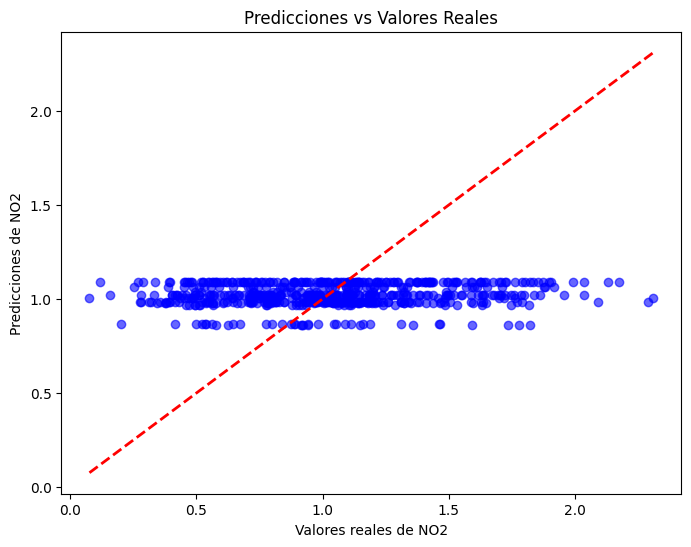

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Valores reales de NO2")
plt.ylabel("Predicciones de NO2")
plt.title("Predicciones vs Valores Reales")
plt.show()



La línea roja indica la predicción perfecta, sin embargo al estar los puntos mas dispersos se puede concluir que el modelo tiene errores grandes en esas observaciones.

# ***Conclusiones***
En primera instancia se puede determinar que una mayor contaminacion del aire no afecta a factores de salud como el estres o la horas de sueño y tampoco pareciera afectar a un rango determinado de edades.

Estos ultimos modelos, metricas y observaciones nos dejan ver que si bien si hay una correlacion entre los distritos y la cantidad de NO2 presentes en los mismos, el modelo predictivo casi no logra predecir los niveles de NO2 usando las variables que se seleccionaron.

Esto quiere decir que probablemente haya factores mucho más relevantes para la contaminación de NO2 que no se estan considerando (tráfico, industria, meteorología, ubicación exacta, hora del día, etc.). Por lo que se puede concluir que si bien hay ciertos distritos donde se obervan mayores niveles de contaminacion, hacen falta mas datos respecto a estos mismos para poder predecir de manera correcta la variacion de los mismos, podria tenerse en cuenta distritos que se encuentran en zonas muy industrializadas.